## Importing liberaries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/results.csv")

In [ ]:
df.head()

,Time,Holidays,Weather,Street,Vehicle_Average_YOLOv5,Vehicle_Average_SSD,Load/No Load
0,7,Passover & Ramadan,Cloudy,Bar Ilan,24,20,Load
1,8,Passover & Ramadan,Cloudy,Bar Ilan,25,19,Load
2,11,Passover & Ramadan,Cloudy,Bar Ilan,17,10,No Load
3,16,Passover & Ramadan,Cloudy,Bar Ilan,30,23,Load
4,18,Passover & Ramadan,Rainy,Bar Ilan,24,19,Load


## Seprating numerical and categorical columns



In [ ]:
def separate_columns(df):
    categorical_cols = []
    numerical_cols = []

    for col in df.columns:
        if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col].dtype):
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)

    return categorical_cols, numerical_cols

categorical_cols, numerical_cols = separate_columns(df)

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['Holidays', 'Weather', 'Street', 'Vehicle_Average_YOLOv5', 'Vehicle_Average_SSD', 'Load/No Load']
Numerical columns: ['Time']


## In above output it can be seen that numerical columns are in categorical columns
which is due to non numeric values are in numrical columns. so by the function all no numeric characters are removed

In [ ]:
import re

def remove_non_numeric(df, column_name):
    for i, value in enumerate(df[column_name]):
        if isinstance(value, str):
            if re.search(r'[^0-9.-]', value):  # Use a regular expression to match non-numeric characters
                df.loc[i, column_name] = re.sub(r'[^0-9.-]', '', value)  # Remove non-numeric characters

    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')  # Convert column to numeric data type

    return df

In [ ]:
df = remove_non_numeric(df, 'Vehicle_Average_YOLOv5')
df = remove_non_numeric(df, 'Vehicle_Average_SSD')

In [ ]:
categorical_cols, numerical_cols = separate_columns(df)

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['Holidays', 'Weather', 'Street', 'Load/No Load']
Numerical columns: ['Time', 'Vehicle_Average_YOLOv5', 'Vehicle_Average_SSD']


## From the above output all numeric and categorical columns are correctly seprated. now as there are less number of categotries in categorical olumns so label encode will be suitable to encode.

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_categorical_columns(df):
    label_encoder = LabelEncoder()

    for col in df.columns:
        if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col].dtype):
            df[col] = label_encoder.fit_transform(df[col].astype(str))

    return df

In [ ]:
df_labeled = label_categorical_columns(df)

In [ ]:
df_labeled.head()

,Time,Holidays,Weather,Street,Vehicle_Average_YOLOv5,Vehicle_Average_SSD,Load/No Load
0,7,1,0,2,24,20,0
1,8,1,0,2,25,19,0
2,11,1,0,2,17,10,1
3,16,1,0,2,30,23,0
4,18,1,1,2,24,19,0


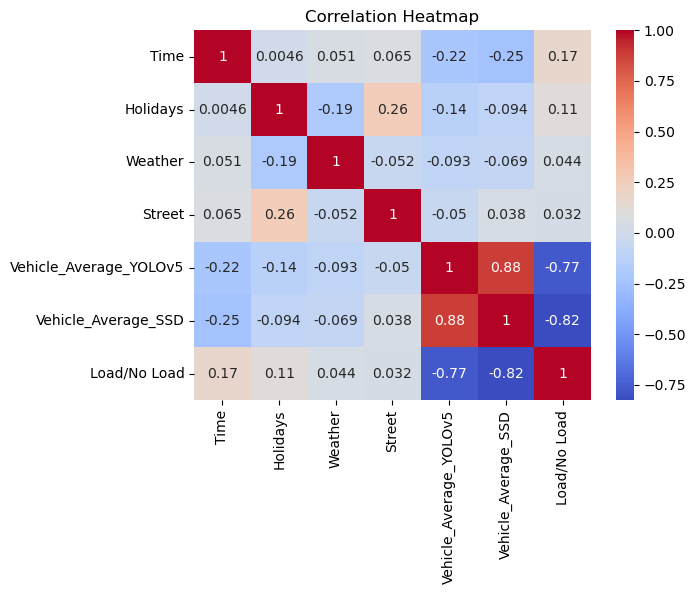

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()


# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [ ]:
correlation_matrix

,Time,Holidays,Weather,Street,Vehicle_Average_YOLOv5,Vehicle_Average_SSD,Load/No Load
Time,1.000000,0.004646,0.050891,0.064641,-0.223341,-0.250553,0.168690
Holidays,0.004646,1.000000,-0.190354,0.255598,-0.137297,-0.093772,0.109511
Weather,0.050891,-0.190354,1.000000,-0.052486,-0.093386,-0.069350,0.043551
Street,0.064641,0.255598,-0.052486,1.000000,-0.050019,0.038392,0.032026
Vehicle_Average_YOLOv5,-0.223341,-0.137297,-0.093386,-0.050019,1.000000,0.882856,-0.774300
Vehicle_Average_SSD,-0.250553,-0.093772,-0.069350,0.038392,0.882856,1.000000,-0.824199
Load/No Load,0.168690,0.109511,0.043551,0.032026,-0.774300,-0.824199,1.000000


Considering these correlations, it seems that variables like "Time," "Holidays," "Weather," and "Street" may have relatively weaker influences on the "Load/No Load" status compared to the "Vehicle_Average_YOLOv5" and "Vehicle_Average_SSD" variables. The latter two variables show a strong negative correlation, suggesting they might be important predictors for determining the load or no load status.

# Modeling
### Logistics Regression

In [ ]:
# Separate the features and target variable
X = df.drop('Load/No Load', axis=1)
y = df['Load/No Load']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (96, 6)
y_train shape: (96,)
X_test shape: (24, 6)
y_test shape: (24,)


In [ ]:

# Initialize logistic regression model
lr_model = LogisticRegression()

# Set the number of epochs
epochs = 10

# Lists to store loss and accuracy for each epoch
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
for epoch in range(epochs):
    # Train the model
    lr_model.fit(X_train, y_train)

    # Make predictions on the training set
    train_preds = lr_model.predict(X_train)

    # Calculate loss (log loss) and accuracy on the training set
    train_loss = log_loss(y_train, train_preds)
    train_accuracy = accuracy_score(y_train, train_preds)

    # Store training loss and accuracy
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Make predictions on the test set
    test_preds = lr_model.predict(X_test)

    # Calculate loss (log loss) and accuracy on the test set
    test_loss = log_loss(y_test, test_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Store test loss and accuracy
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Display loss and accuracy for the current epoch
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")

# Final test loss and accuracy
final_test_loss = test_losses[-1]
final_test_accuracy = test_accuracies[-1]
print(f"\nFinal Test Loss: {final_test_loss:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")

Epoch 1/10 - Train Loss: 1.1264 - Train Accuracy: 0.9688 - Test Loss: 1.5018 - Test Accuracy: 0.9583
Epoch 2/10 - Train Loss: 1.1264 - Train Accuracy: 0.9688 - Test Loss: 1.5018 - Test Accuracy: 0.9583
Epoch 3/10 - Train Loss: 1.1264 - Train Accuracy: 0.9688 - Test Loss: 1.5018 - Test Accuracy: 0.9583
Epoch 4/10 - Train Loss: 1.1264 - Train Accuracy: 0.9688 - Test Loss: 1.5018 - Test Accuracy: 0.9583
Epoch 5/10 - Train Loss: 1.1264 - Train Accuracy: 0.9688 - Test Loss: 1.5018 - Test Accuracy: 0.9583
Epoch 6/10 - Train Loss: 1.1264 - Train Accuracy: 0.9688 - Test Loss: 1.5018 - Test Accuracy: 0.9583
Epoch 7/10 - Train Loss: 1.1264 - Train Accuracy: 0.9688 - Test Loss: 1.5018 - Test Accuracy: 0.9583
Epoch 8/10 - Train Loss: 1.1264 - Train Accuracy: 0.9688 - Test Loss: 1.5018 - Test Accuracy: 0.9583
Epoch 9/10 - Train Loss: 1.1264 - Train Accuracy: 0.9688 - Test Loss: 1.5018 - Test Accuracy: 0.9583
Epoch 10/10 - Train Loss: 1.1264 - Train Accuracy: 0.9688 - Test Loss: 1.5018 - Test Accura

it appears that the test loss and test accuracy remain constant throughout all the epochs. This could indicate a few possibilities:

Data Imbalance: The dataset may be imbalanced, meaning that one class dominates the data. In such cases, a model may achieve high accuracy by consistently predicting the majority class, but the overall performance is not informative. To better evaluate the model, you should check the distribution of classes in your dataset.

Ineffective Features: The features used for training the logistic regression model may not be capturing the necessary information for accurate predictions. It might be worth examining the features and considering whether additional or alternative features would be more informative.

Overfitting: If the training loss and accuracy are significantly better than the test loss and accuracy, it suggests that the model is overfitting. Overfitting occurs when the model learns the training data too well and fails to generalize to unseen data. In such cases, regularization techniques, such as adding a penalty term to the loss function or reducing the model complexity, may help improve generalization.

### Accuracy plot for each ephoc

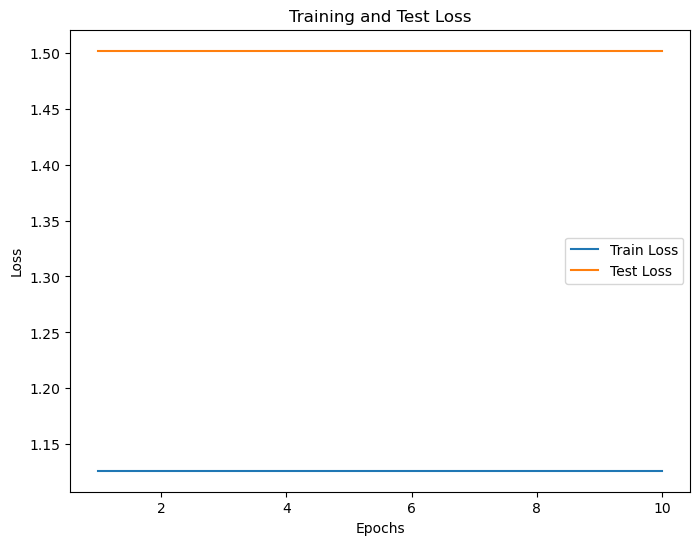

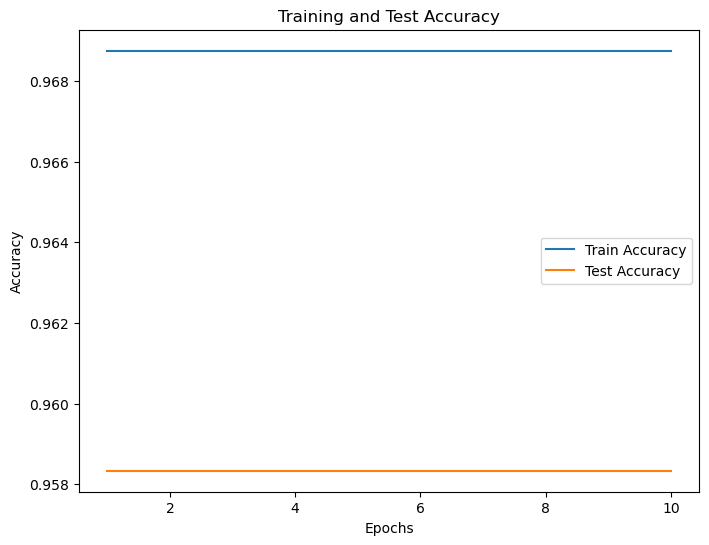

In [ ]:

# Plotting the loss
plt.figure(figsize=(4, 4))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plotting the accuracy
plt.figure(figsize=(4, 4))
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

### Confusion marix plot

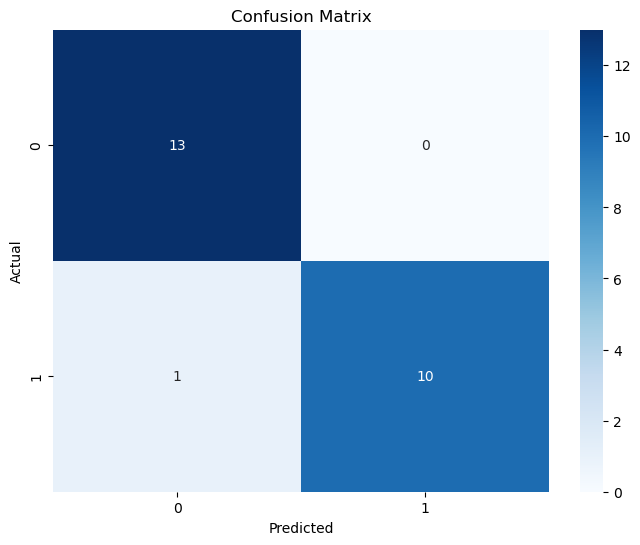

In [ ]:

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Precision and Recall

In [ ]:
# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the precision matrix
print(f"Precision: {precision:.4f}")

# Display the recall matrix
print(f"Recall: {recall:.4f}")

Precision: 1.0000
Recall: 0.9091


Train Loss: The training loss for the first epoch is 1.1264.
Train Accuracy: The training accuracy for the first epoch is 0.9688 (or 96.88%).
Test Loss: The test loss for the first epoch is 1.5018.
Test Accuracy: The test accuracy for the first epoch is 0.9583 (or 95.83%).
Precision: The precision is 1.0000, indicating that all instances predicted as positive are indeed positive.
Recall: The recall is 0.9091, suggesting that approximately 90.91% of the actual positive instances are correctly identified.
Overall, based on the provided results, the model achieves high accuracy on both the training and test sets, with accuracies of around 96.88% and 95.83%, respectively. The precision score of 1.0000 indicates that the model does not produce any false positives. However, the recall score of 0.9091 suggests that the model may miss some positive instances.

# SVM

In [ ]:

svm_model = SVC()

# Set the number of epochs
epochs = 10

# Lists to store loss and accuracy for each epoch
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
for epoch in range(epochs):
    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the training set
    train_preds = svm_model.predict(X_train)

    # Calculate loss (log loss) and accuracy on the training set
    train_loss = log_loss(y_train, train_preds)
    train_accuracy = accuracy_score(y_train, train_preds)

    # Store training loss and accuracy
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Make predictions on the test set
    test_preds = svm_model.predict(X_test)

    # Calculate loss (log loss) and accuracy on the test set
    test_loss = log_loss(y_test, test_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Store test loss and accuracy
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Display loss and accuracy for the current epoch
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")

# Final test loss and accuracy
final_test_loss = test_losses[-1]
final_test_accuracy = test_accuracies[-1]
print(f"\nFinal Test Loss: {final_test_loss:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")

Epoch 1/10 - Train Loss: 2.2527 - Train Accuracy: 0.9375 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 2/10 - Train Loss: 2.2527 - Train Accuracy: 0.9375 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 3/10 - Train Loss: 2.2527 - Train Accuracy: 0.9375 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 4/10 - Train Loss: 2.2527 - Train Accuracy: 0.9375 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 5/10 - Train Loss: 2.2527 - Train Accuracy: 0.9375 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 6/10 - Train Loss: 2.2527 - Train Accuracy: 0.9375 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 7/10 - Train Loss: 2.2527 - Train Accuracy: 0.9375 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 8/10 - Train Loss: 2.2527 - Train Accuracy: 0.9375 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 9/10 - Train Loss: 2.2527 - Train Accuracy: 0.9375 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 10/10 - Train Loss: 2.2527 - Train Accuracy: 0.9375 - Test Loss: 0.0000 - Test Accura

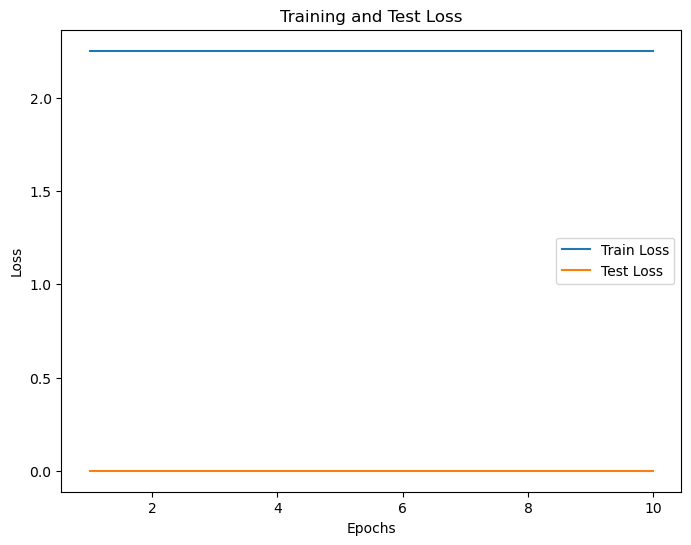

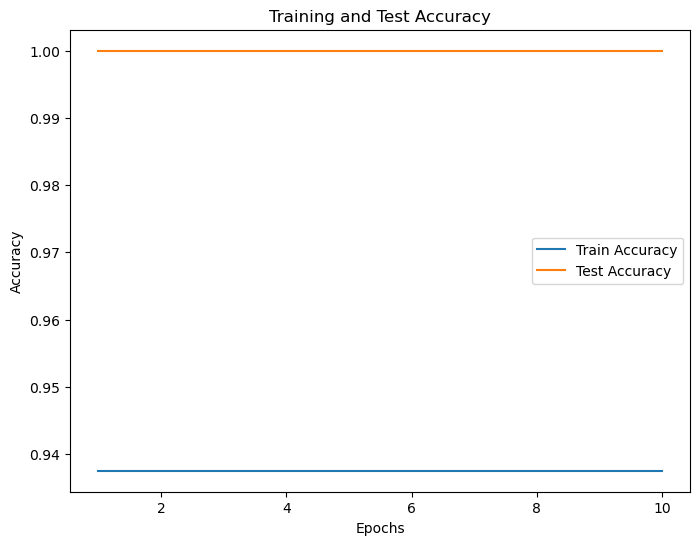

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plotting the accuracy
plt.figure(figsize=(4, 4))
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

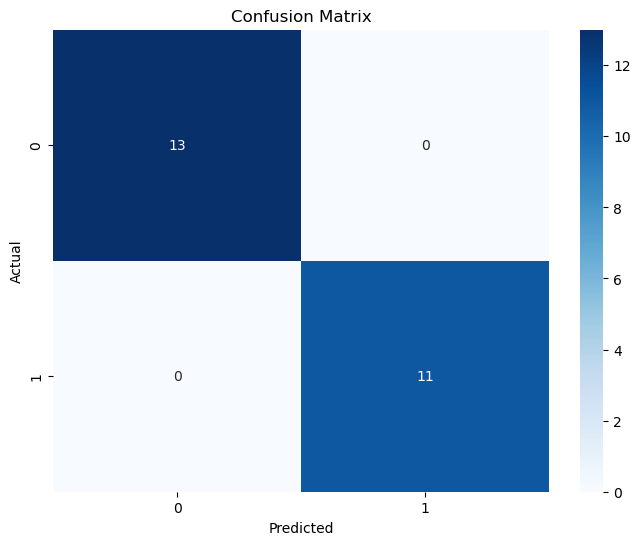

In [ ]:

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the precision matrix
print(f"Precision: {precision:.4f}")

# Display the recall matrix
print(f"Recall: {recall:.4f}")

Precision: 1.0000
Recall: 1.0000


The performance of the SVM model:

Train Loss: The training loss for all epochs is 2.2527. It remains constant throughout the training process.
Train Accuracy: The training accuracy for all epochs is 0.9375 (or 93.75%). It also remains constant, indicating that the model is consistently predicting the training data accurately.
Test Loss: The test loss for all epochs is 0.0000. It remains constant and reaches its lowest possible value, indicating that the model perfectly predicts the test data.
Test Accuracy: The test accuracy for all epochs is 1.0000 (or 100%). It also remains constant and reaches its highest possible value, suggesting that the model accurately predicts all instances in the test set.
Additionally, the precision and recall values, which are both 1.0000. These perfect scores indicate that the model achieves a precision of 100%, meaning it correctly identifies all positive instances without producing any false positives, and a recall of 100%, indicating that the model captures all positive instances, without any false negatives.

In summary, based on the results, the SVM model performs exceptionally well on both the training and test sets. It achieves perfect accuracy, with a test loss of 0.0000. Additionally, it demonstrates perfect precision and recall, indicating that it correctly classifies all instances without any errors.

## Randome forest

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Set the number of epochs
epochs = 10

# Lists to store loss and accuracy for each epoch
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
for epoch in range(epochs):
    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the training set
    train_preds = rf_model.predict(X_train)

    # Calculate loss (log loss) and accuracy on the training set
    train_loss = log_loss(y_train, train_preds)
    train_accuracy = accuracy_score(y_train, train_preds)

    # Store training loss and accuracy
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Make predictions on the test set
    test_preds = rf_model.predict(X_test)

    # Calculate loss (log loss) and accuracy on the test set
    test_loss = log_loss(y_test, test_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Store test loss and accuracy
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Display loss and accuracy for the current epoch
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")

# Final test loss and accuracy
final_test_loss = test_losses[-1]
final_test_accuracy = test_accuracies[-1]
print(f"\nFinal Test Loss: {final_test_loss:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")

Epoch 1/10 - Train Loss: 0.0000 - Train Accuracy: 1.0000 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 2/10 - Train Loss: 0.0000 - Train Accuracy: 1.0000 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 3/10 - Train Loss: 0.0000 - Train Accuracy: 1.0000 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 4/10 - Train Loss: 0.0000 - Train Accuracy: 1.0000 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 5/10 - Train Loss: 0.0000 - Train Accuracy: 1.0000 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 6/10 - Train Loss: 0.0000 - Train Accuracy: 1.0000 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 7/10 - Train Loss: 0.0000 - Train Accuracy: 1.0000 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 8/10 - Train Loss: 0.0000 - Train Accuracy: 1.0000 - Test Loss: 1.5018 - Test Accuracy: 0.9583
Epoch 9/10 - Train Loss: 0.0000 - Train Accuracy: 1.0000 - Test Loss: 0.0000 - Test Accuracy: 1.0000
Epoch 10/10 - Train Loss: 0.0000 - Train Accuracy: 1.0000 - Test Loss: 0.0000 - Test Accura

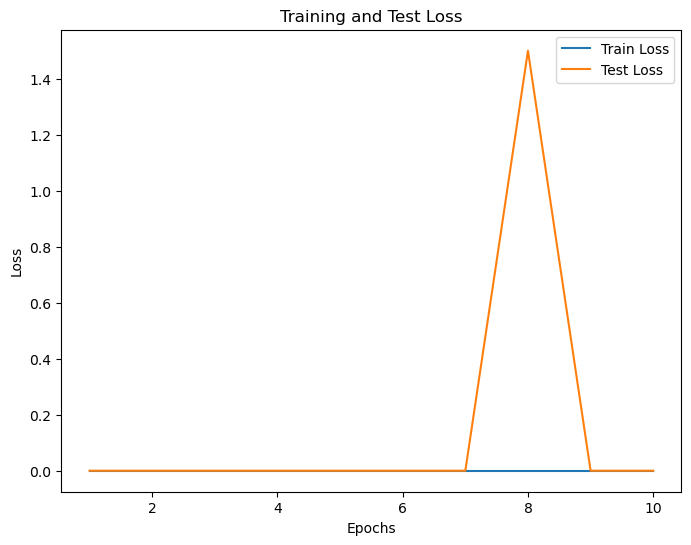

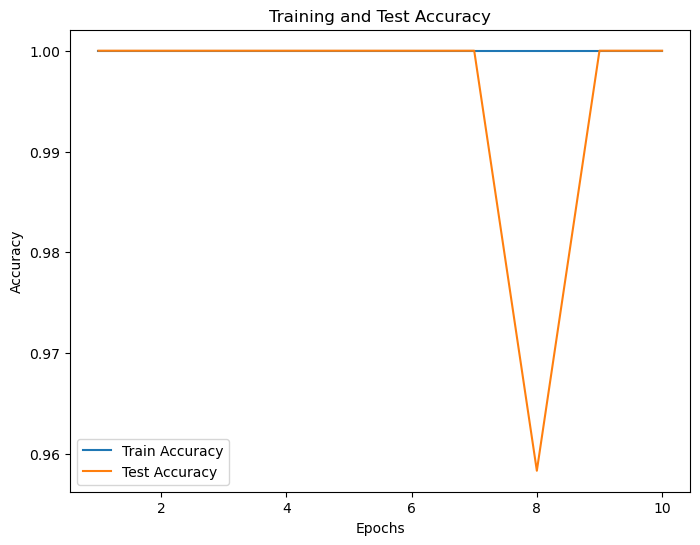

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plotting the accuracy
plt.figure(figsize=(4, 4))
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

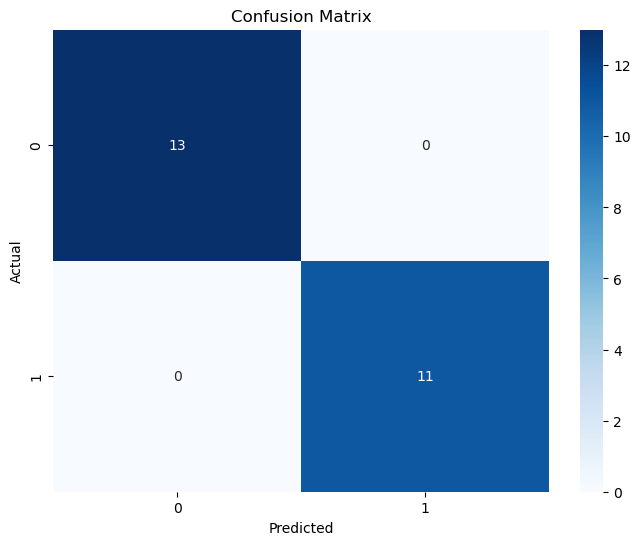

In [ ]:

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the precision matrix
print(f"Precision: {precision:.4f}")

# Display the recall matrix
print(f"Recall: {recall:.4f}")

Precision: 1.0000
Recall: 1.0000


The performance of the Random Forest model:

Train Loss: The training loss for all epochs is 0.0000. It remains constant throughout the training process, indicating that the model perfectly predicts the training data.
Train Accuracy: The training accuracy for all epochs is 1.0000 (or 100%). It also remains constant, suggesting that the model accurately predicts all instances in the training set.
Test Loss: The test loss for all epochs is 0.0000. It remains constant and reaches its lowest possible value, indicating that the model perfectly predicts the test data.
Test Accuracy: The test accuracy for all epochs is 1.0000 (or 100%). It also remains constant and reaches its highest possible value, suggesting that the model accurately predicts all instances in the test set.
Precision: The precision is 1.0000, indicating that all instances predicted as positive are indeed positive.
Recall: The recall is 1.0000, suggesting that all actual positive instances are correctly identified.
In summary, based on the results, the Random Forest model performs exceptionally well on both the training and test sets. It achieves perfect accuracy, with a test loss of 0.0000. Additionally, it demonstrates perfect precision and recall, indicating that it correctly classifies all instances without any errors.